In [6]:
import numpy as np
import math as m
import matplotlib.pyplot as plot
import pandas as pd

In [7]:
hbar =  6.582119569e-25 #Gev*s
masspaper = [300,500,1000]
widthspaper = [3.046601e-01,1.506857e+00, 1.239208e+01]


In [8]:
def printing(set_dataX, set_dataY,set_exponents,experimental):
    plot.grid(True, which="both")
    for i in range(len(set_dataX)):
        plot.semilogy(set_dataX[i], set_dataX[i],experimental)
    plot.xlabel('mass[GeV/c^2]')
    plot.ylabel('lifetime[s]')
    plot.legend(["U = 1e-"+str(i) for i in set_exponents])
    plot.ylim([1e-15,1e-7])
    plot.xlim([0.1,5])
    plot.show()
    

    

In [9]:
def LifeTime(mass, exponent):
    GF = 1.1663787e-5
    decay = 11.9*GF*GF*(1/(96*np.pi**3))*(3)*(10**(-2*exponent))*(mass**5)
    lifetime = hbar/decay
    return lifetime

In [10]:
LifeTime(20,1)


1.260634718886587e-17

In [9]:
exponents = range(6)
masses_first = [0.2, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
masses_second = [i for i in range(7,22)]
mass_full = masses_first+masses_second
masses = np.asarray([mass_full for e in exponents])

index = range(6)
lifetimes = []
for i in index:
    filename = "/home/santi/Documents/TOOLS/DECAYS/1e0"+str(i)+".txt"
    decaywidths_first = np.asarray(pd.read_csv(filename,sep="\s+", header=None).iloc[:,2])[0:13]
    decaywidths_second = np.asarray(pd.read_csv(filename,sep="\s+", header=None).iloc[:,2])[19:34]
    decaywidths_i = np.concatenate((decaywidths_first, decaywidths_second), axis=None)
    lifetimes.append(hbar/decaywidths_i)

print(np.size(lifetimes[4]))

print(np.size(masses[4]))
print(LifeTime(masses[4],4))


28
28
[1.26063472e-01 1.29088995e-03 4.03403110e-05 5.31230433e-06
 1.26063472e-06 4.13084785e-07 1.66009510e-07 7.68066848e-08
 3.93948350e-08 2.18613347e-08 1.29088995e-08 8.01541097e-09
 5.18779720e-09 2.40020890e-09 1.23108859e-09 6.83166709e-10
 4.03403110e-10 2.50481593e-10 1.62118662e-10 1.08648186e-10
 7.50065282e-11 5.31230433e-11 3.84715185e-11 2.84115309e-11
 2.13489597e-11 1.62918813e-11 1.26063472e-11 9.87740289e-12]


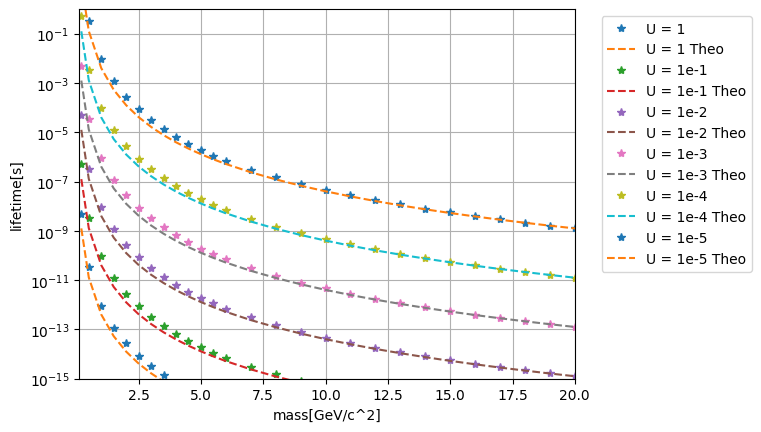

In [10]:
plot.grid(True, which="both")
indices = range(6)
for index in indices :
    plot.semilogy(masses[index], lifetimes[index],"*")
    plot.semilogy(masses[index], LifeTime(masses[index],index),"--")
plot.ylim([1e-15,1])
plot.xlim([0.1,20])
plot.xlabel('mass[GeV/c^2]')
plot.ylabel('lifetime[s]')
plot.legend(["U = 1","U = 1 Theo","U = 1e-1","U = 1e-1 Theo","U = 1e-2","U = 1e-2 Theo","U = 1e-3","U = 1e-3 Theo","U = 1e-4","U = 1e-4 Theo", "U = 1e-5", "U = 1e-5 Theo"],bbox_to_anchor=(1.04, 1), loc="upper left")

plot.show()

/tmp/ipykernel_144270/976063220.py:4: RuntimeWarning: divide by zero encountered in divide
  lifetime = hbar/decay


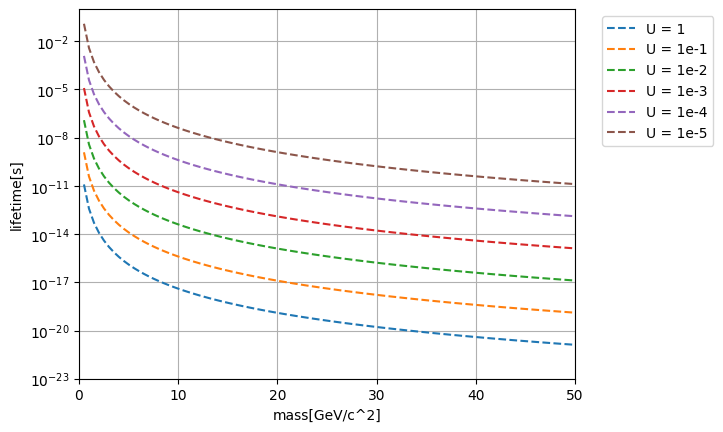

In [15]:
plot.grid(True, which="both")
indices = range(6)
for index in indices :
    plot.semilogy(np.linspace(0,50,100), LifeTime(np.linspace(0,50,100),index),"--")
plot.ylim([1e-23,1])
plot.xlim([0,50])
plot.xlabel('mass[GeV/c^2]')
plot.ylabel('lifetime[s]')
plot.legend(["U = 1","U = 1e-1","U = 1e-2","U = 1e-3","U = 1e-4", "U = 1e-5", ],bbox_to_anchor=(1.04, 1), loc="upper left")

plot.show()